In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

##PREGUNTAS
- como se han gganado mas partidos, estando en casa o de visitante?
- que equipos han hecho la mayot cantidad de puntos, tanto en casa como de visitante?
-cuantos partidos han ganado los distintos equipos estando en casa y de visitante?
- como se ha comportado los puntos anotados a lo largo del anio?
- contra cuales equipos han ganado mas estando en casa y visitante?

In [40]:
games = pd.read_csv('games.csv')
games.head()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float6

In [41]:
games = games[['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 
            'TEAM_ID_home', 'TEAM_ID_away', 'PTS_home', 'PTS_away',
            'HOME_TEAM_WINS']]
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,120.0,112.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,114.0,106.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,113.0,93.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,108.0,110.0,0


In [42]:
games['GAME_DATE_EST'] = pd.to_datetime(games['GAME_DATE_EST'])
# games.loc[:,'GAME_DATA_EST'] = pd.to_datetime(games['GAME_DATE_EST'])
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   GAME_DATE_EST     26651 non-null  datetime64[ns]
 1   GAME_ID           26651 non-null  int64         
 2   GAME_STATUS_TEXT  26651 non-null  object        
 3   TEAM_ID_home      26651 non-null  int64         
 4   TEAM_ID_away      26651 non-null  int64         
 5   PTS_home          26552 non-null  float64       
 6   PTS_away          26552 non-null  float64       
 7   HOME_TEAM_WINS    26651 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 1.6+ MB


In [45]:
games['year'] = games['GAME_DATE_EST'].dt.year
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,year
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022
1,2022-12-22,22200478,Final,1610612762,1610612764,120.0,112.0,1,2022
2,2022-12-21,22200466,Final,1610612739,1610612749,114.0,106.0,1,2022
3,2022-12-21,22200467,Final,1610612755,1610612765,113.0,93.0,1,2022
4,2022-12-21,22200468,Final,1610612737,1610612741,108.0,110.0,0,2022


In [47]:
teams = pd.read_csv('teams.csv')
teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


In [50]:
teams = teams[['TEAM_ID', 'CITY', 'NICKNAME']]
teams.head()

,TEAM_ID,CITY,NICKNAME
0,1610612737,Atlanta,Hawks
1,1610612738,Boston,Celtics
2,1610612740,New Orleans,Pelicans
3,1610612741,Chicago,Bulls
4,1610612742,Dallas,Mavericks


In [51]:
home_games = pd.merge(games, teams, 
                    left_on='TEAM_ID_home', 
                    right_on='TEAM_ID', 
                    how='inner')
home_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,year,TEAM_ID,CITY,NICKNAME
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans
1,2022-12-19,22200457,Final,1610612740,1610612749,119.0,128.0,0,2022,1610612740,New Orleans,Pelicans
2,2022-12-11,22200395,Final,1610612740,1610612756,129.0,124.0,1,2022,1610612740,New Orleans,Pelicans
3,2022-12-09,22200384,Final,1610612740,1610612756,128.0,117.0,1,2022,1610612740,New Orleans,Pelicans
4,2022-12-07,22200371,Final,1610612740,1610612765,104.0,98.0,1,2022,1610612740,New Orleans,Pelicans


In [54]:
home_games = home_games.rename(columns={
    'CITY': 'city_home',
    'NICKNAME': 'nickname_home'
})
home_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,year,TEAM_ID,city_home,nickname_home
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans
1,2022-12-19,22200457,Final,1610612740,1610612749,119.0,128.0,0,2022,1610612740,New Orleans,Pelicans
2,2022-12-11,22200395,Final,1610612740,1610612756,129.0,124.0,1,2022,1610612740,New Orleans,Pelicans
3,2022-12-09,22200384,Final,1610612740,1610612756,128.0,117.0,1,2022,1610612740,New Orleans,Pelicans
4,2022-12-07,22200371,Final,1610612740,1610612765,104.0,98.0,1,2022,1610612740,New Orleans,Pelicans


In [55]:
both_games = pd.merge(home_games, teams, 
                    left_on='TEAM_ID_away', 
                    right_on='TEAM_ID', 
                    how='inner')
both_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,year,TEAM_ID_x,city_home,nickname_home,TEAM_ID_y,CITY,NICKNAME
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
1,2022-04-13,52100131,Final,1610612740,1610612759,113.0,103.0,1,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
2,2022-03-26,22101107,Final,1610612740,1610612759,103.0,107.0,0,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
3,2022-02-12,22100848,Final,1610612740,1610612759,114.0,124.0,0,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
4,2021-04-24,22000264,Final,1610612740,1610612759,108.0,110.0,0,2021,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs


In [57]:
both_games = both_games.rename(columns={
    'CITY': 'city_away',
    'NICKNAME': 'nickname_away'
})
both_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,year,TEAM_ID_x,city_home,nickname_home,TEAM_ID_y,city_away,nickname_away
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
1,2022-04-13,52100131,Final,1610612740,1610612759,113.0,103.0,1,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
2,2022-03-26,22101107,Final,1610612740,1610612759,103.0,107.0,0,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
3,2022-02-12,22100848,Final,1610612740,1610612759,114.0,124.0,0,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
4,2021-04-24,22000264,Final,1610612740,1610612759,108.0,110.0,0,2021,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs


In [58]:
both_games = both_games.drop(columns=[
    'TEAM_ID_home','TEAM_ID_away', 'TEAM_ID_x', 'TEAM_ID_y' 
])
both_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,PTS_home,PTS_away,HOME_TEAM_WINS,year,city_home,nickname_home,city_away,nickname_away
0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs
1,2022-04-13,52100131,Final,113.0,103.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs
2,2022-03-26,22101107,Final,103.0,107.0,0,2022,New Orleans,Pelicans,San Antonio,Spurs
3,2022-02-12,22100848,Final,114.0,124.0,0,2022,New Orleans,Pelicans,San Antonio,Spurs
4,2021-04-24,22000264,Final,108.0,110.0,0,2021,New Orleans,Pelicans,San Antonio,Spurs


In [59]:
games = both_games.copy()
games.columns = games.columns.str.lower()
games.head()

,game_date_est,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,city_home,nickname_home,city_away,nickname_away
0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs
1,2022-04-13,52100131,Final,113.0,103.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs
2,2022-03-26,22101107,Final,103.0,107.0,0,2022,New Orleans,Pelicans,San Antonio,Spurs
3,2022-02-12,22100848,Final,114.0,124.0,0,2022,New Orleans,Pelicans,San Antonio,Spurs
4,2021-04-24,22000264,Final,108.0,110.0,0,2021,New Orleans,Pelicans,San Antonio,Spurs


In [60]:
games['total_points'] = games['pts_home'] + games['pts_away']
games.head()

,game_date_est,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,city_home,nickname_home,city_away,nickname_away,total_points
0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs,243.0
1,2022-04-13,52100131,Final,113.0,103.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs,216.0
2,2022-03-26,22101107,Final,103.0,107.0,0,2022,New Orleans,Pelicans,San Antonio,Spurs,210.0
3,2022-02-12,22100848,Final,114.0,124.0,0,2022,New Orleans,Pelicans,San Antonio,Spurs,238.0
4,2021-04-24,22000264,Final,108.0,110.0,0,2021,New Orleans,Pelicans,San Antonio,Spurs,218.0


In [61]:
games.nlargest(n=5, columns='total_points')

,game_date_est,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,city_home,nickname_home,city_away,nickname_away,total_points
8301,2019-03-01,21800928,Final,161.0,168.0,0,2019,Atlanta,Hawks,Chicago,Bulls,329.0
1994,2006-12-07,20600271,Final,157.0,161.0,0,2006,Brooklyn,Nets,Phoenix,Suns,318.0
10704,2019-10-30,21900061,Final,158.0,159.0,0,2019,Washington,Wizards,Houston,Rockets,317.0
835,2022-02-25,22100899,Final,153.0,157.0,0,2022,Washington,Wizards,San Antonio,Spurs,310.0
10577,2020-07-31,21901238,Final,149.0,153.0,0,2020,Dallas,Mavericks,Houston,Rockets,302.0


In [62]:
games.nsmallest(n=5, columns='total_points')

,game_date_est,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,city_home,nickname_home,city_away,nickname_away,total_points
23366,2007-10-19,10700072,Final,36.0,33.0,1,2007,Boston,Celtics,Brooklyn,Nets,69.0
8684,2003-10-08,10300012,Final,62.0,58.0,1,2003,Indiana,Pacers,Chicago,Bulls,120.0
10973,2004-11-09,20400049,Final,64.0,60.0,1,2004,Brooklyn,Nets,Portland,Trail Blazers,124.0
12987,2005-03-13,20400927,Final,64.0,62.0,1,2005,Detroit,Pistons,Utah,Jazz,126.0
4857,2003-11-01,20300031,Final,73.0,56.0,1,2003,Minnesota,Timberwolves,Toronto,Raptors,129.0


In [65]:
total = games['home_team_wins'].value_counts()
total

home_team_wins
1    15645
0    11006
Name: count, dtype: int64

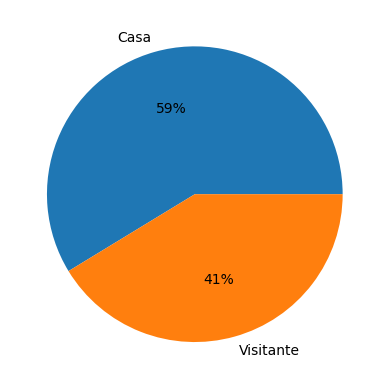

In [67]:
plt.pie(total.values, labels=['Casa', 'Visitante'], autopct='%.0f%%')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4424\629285295.py:4: FutureWarning: The provided callable <function mean at 0x0000025544DEB100> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  result = home_wins.groupby('nickname_home')['pts_home'].aggregate(np.mean).reset_index().sort_values('pts_home')


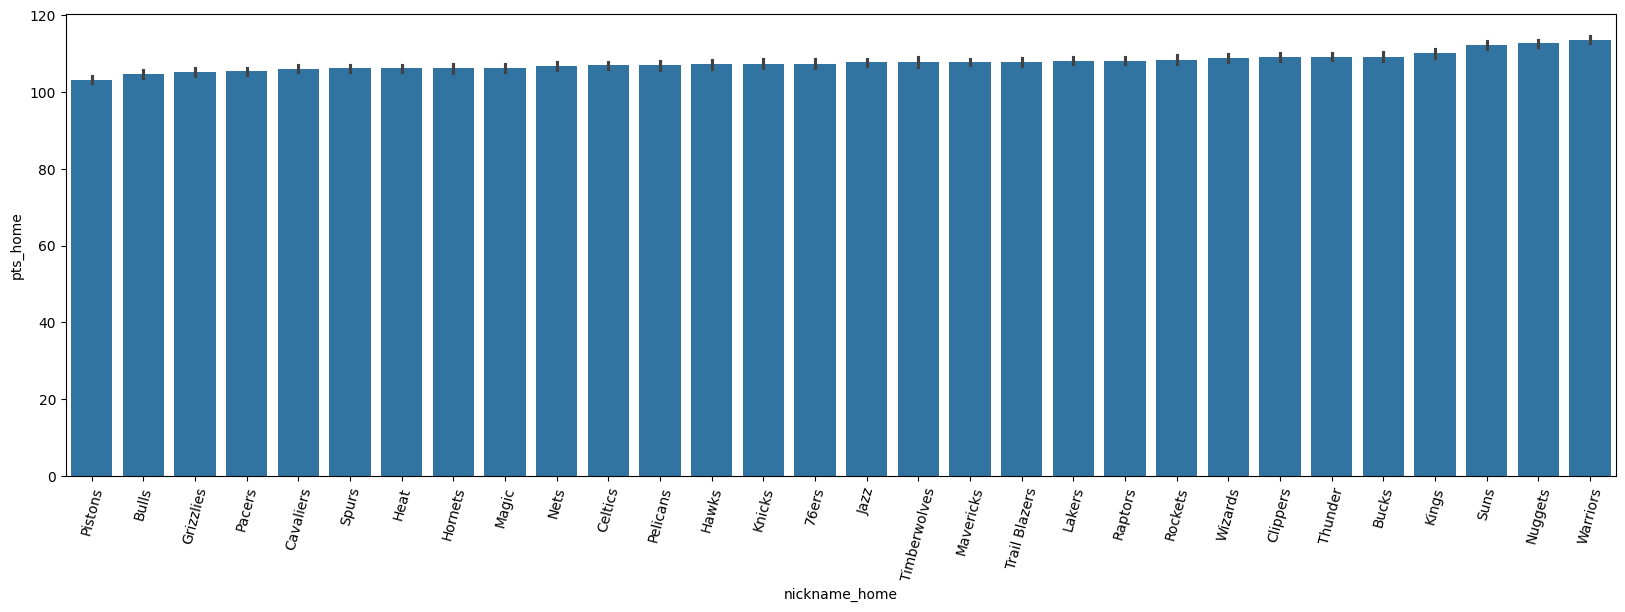

In [73]:
# cantidad de puntos por equipo cuando juegan en casa o de visita
plt.figure(figsize=(20,6))
home_wins = games[games['home_team_wins'] == 1]
result = home_wins.groupby('nickname_home')['pts_home'].aggregate(np.mean).reset_index().sort_values('pts_home')

ax = sns.barplot(data=home_wins, x='nickname_home', y='pts_home', order=result['nickname_home'])
plt.xticks(rotation=75)
plt.show()